 Elaborar un modelo predictivo aplicando el algoritmo clasificador SVM
para resolver un problema de clasificación utilizando lenguaje Python.

Con el fin de clasificar las distintas actividades que puede realizar una
persona, se realizó un experimento a un grupo de 30 voluntarios dentro de
un grupo de edad de 19 a 48 años. Cada persona realizó seis actividades
(CAMINAR, CAMINAR POR LAS ESCALERAS, BAJAR LAS ESCALERAS,
SENTARSE, DE PIE, RECOSTARSE) con un smartphone (Samsung Galaxy S II)
conectado en su cintura. Usando el acelerómetro y giroscopio integrados en
el smartphone, se tienen la siguiente data:

• Aceleración triaxial del acelerómetro (aceleración total) y la
aceleración corporal estimada.

• Velocidad angular triaxial del giroscopio.

• Variables de dominio de tiempo y frecuencia.

• Su etiqueta de actividad.

• Un identificador del sujeto que realizó el experimento.

El conjunto de datos obtenido se ha dividido aleatoriamente en dos
conjuntos (train y test), donde se seleccionó al 70% de los voluntarios para
generar los datos de entrenamiento y al 30% los datos de la prueba.
Estos datos se encuentran en los siguientes links:

train: https://raw.githubusercontent.com/natjulian/Contribuci-nDiplomado-Data-Science-UC2021/main/Bases%20de%20datos%20Clases/Activity/train.csv


test: https://raw.githubusercontent.com/natjulian/Contribuci-n-DiplomadoData-Science-UC2021/main/Bases%20de%20datos%20Clases/Activity/test.csv

a) Cargue los set de datos de entrenamiento y prueba. ¿Cuáles son las
dimensiones de estos set de datos?

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC # Support Vector Classifier | Support Vector Regressor
from sklearn.model_selection import GridSearchCV # Busqueda de hiperparametros
import matplotlib.pyplot as plt


a) Cargue los set de datos de entrenamiento y prueba. ¿Cuáles son las
dimensiones de estos set de datos?

In [2]:
#Carga de los set de datos de entrenamiento y prueba
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(train_data.columns)
print(test_data.columns)


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)
Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
      

In [32]:
# Mostramos los datos
print('Datos de test:')
print(test_data.head())
print('Datos de train:')
print(train_data.head())

Datos de test:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ..

In [29]:
# Mostramos las dimensiones de los datos
print('Dimensiones de test:', test_data.shape)
print('Dimensiones de train:', train_data.shape)

Dimensiones de test: (2947, 563)
Dimensiones de train: (4805, 563)


b) Estudie la cantidad de registros que hay en cada actividad en el set de
entrenamiento. Para esto, una opción es utilizar la función de pandas
crosstab(index=columna, columns="count"). ¿Cómo se encuentran repartidas
las Actividades? ¿Existe algún desbalance en las categorías? (realice un
gráfico que acompañe su análisis) Comente.

Cantidad de registros por actividad en el set de entrenamiento:
Activity
LAYING                926
STANDING              908
SITTING               849
WALKING               811
WALKING_UPSTAIRS      686
WALKING_DOWNSTAIRS    624
Name: count, dtype: int64


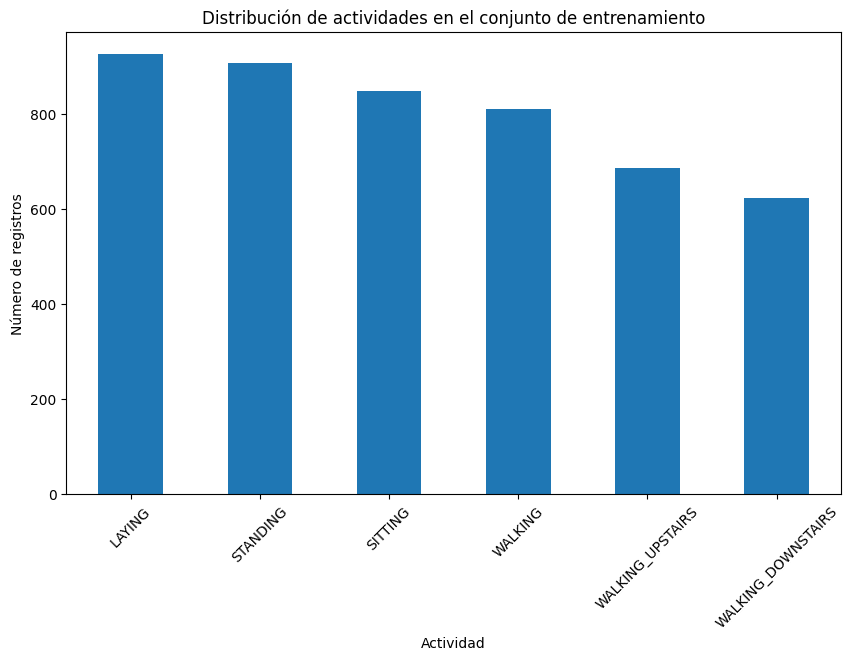

Cantidad de registros por actividad en el set de entrenamiento:
Activity
LAYING                926
STANDING              908
SITTING               849
WALKING               811
WALKING_UPSTAIRS      686
WALKING_DOWNSTAIRS    624
Name: count, dtype: int64


In [3]:
#Estudiamos la cantidad de registros que hay en cada actividad en el set de entrenamiento
activity_counts = train_data['Activity'].value_counts()
print("Cantidad de registros por actividad en el set de entrenamiento:")
print(activity_counts)

# Obtenemos el recuento de cada actividad
activity_counts = train_data['Activity'].value_counts()

# Creamos un gráfico de barras para visualizar la distribución de actividades
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar')
plt.title('Distribución de actividades en el conjunto de entrenamiento')
plt.xlabel('Actividad')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.show()

# Imprimimos el recuento de cada actividad
print("Cantidad de registros por actividad en el set de entrenamiento:")
print(activity_counts)


c) Defina X_train y X_test como corresponda (omitiendo las variables que no
corresponden a variables predictoras).

In [16]:
# Definimos X_train y X_test, omitiendo variables no correspondientes
X_train = train_data.drop(columns=['Activity', 'subject'])
X_test = test_data.drop(columns=['Activity', 'subject'])
print('Tamaño dataset X_train y X_test:')
print(X_train.shape, X_test.shape,'\n')


Tamaño dataset X_train y X_test:
(4805, 561) (2947, 561) 



d) Estandarice el set de features de entrenamiento y prueba. Recuerde que
puede utilizar la función vista en clases StandardScaler:
from sklearn.preprocessing import StandardScaler
x_stand = StandardScaler().fit_transform(x)

In [38]:
# Crear el estandarizador
scaler = StandardScaler()

# Ajustar el estandarizador con los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train) # usa fit_transform() para obtener mu y sigma

# Transformar los datos de prueba con el estandarizador ajustado con los datos de entrenamiento
X_test_scaled = scaler.transform(X_test) # transform() solo porque ya tenemos mu y sigma

e) Defina y_train e y_test como corresponda (recuerde que debe estar
codificada numéricamente). Para recodificar un vector o columna y de varias
categorías a formato numérico puede utilizar:

• from sklearn import preprocessing

• encoder=preprocessing.LabelEncoder().fit(y)

• y_new=encodertrain.transform(y)

In [35]:
# Crear el codificador
encoder = LabelEncoder()

y_train = encoder.fit_transform(train_data['Activity']) # usa fit_transform() para obtener mu y sigma
y_test = encoder.transform(test_data['Activity']) # transform() solo porque ya tenemos mu y sigma
print('Tamaño dataset y_train y y_test:')
print(y_train.shape, y_test.shape,'\n')


Tamaño dataset y_train y y_test:
(4805,) (2947,) 



f) Defina un diccionario con las opciones de:

• El kernel se mueva entre linear o rbf

• El C se mueva entre los valores 10 y 15

In [39]:
# Ahora vamos a implentar 1. los hiperparametros del modelo (kernel, regularizacion)
# kernel como SVM separa los datos
# regularizacion uno de los metodos de como evitar sobreajuste (l2)

param_grid = {'kernel': ['linear', 'rbf'],
              'C': [10, 15]}
# Kernels: kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
# 'C' > 0 parametro de regularizacion, evitar sobreajuste(overfitting) penalty tipo 'l2'.
print(param_grid)


{'kernel': ['linear', 'rbf'], 'C': [10, 15]}


g) Utilice la función GridSearchCV para realizar 10 validaciones cruzadas con
la lista de parámetros definida anteriormente. Determine la mejor
combinación de parámetros y obtenga el modelo con dichos parámetros.

In [24]:
#Se usa la imputación de valores faltantes,
#para reemplazar los valores faltantes (NaN) con la media de la columna
from sklearn.impute import SimpleImputer

# Crear un imputador
imputer = SimpleImputer(strategy='mean')

# Aplicar el imputador a tus datos de entrenamiento
X_train_imputed = imputer.fit_transform(X_train_scaled)

In [37]:
svm_model = SVC() #https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=10)  #GridSearchRandomized()

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train_imputed, y_train)

# Obtener la mejor combinación de parámetros
best_params = grid_search.best_params_

print('Los mejores parametros del modelo estan dados por:')
print(best_params,'\n')
best_model = grid_search.best_estimator_
print(best_model,'\n')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Los mejores parametros del modelo estan dados por:
{'C': 10, 'kernel': 'rbf'} 

SVC(C=10) 



h) ¿Cómo es la capacidad predictiva de este modelo en el set de prueba?
Comente.

In [27]:
accuracy = best_model.score(X_test_scaled, y_test)
print("Exactitud del modelo en el set de prueba:", accuracy)

Exactitud del modelo en el set de prueba: 0.9467254835425857


La precisión obtenida es aproximadamente 0.94, lo que indica un buen rendimiento del modelo en la clasificación